In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('trip_advisor.csv')

ta_df = df.copy()

# DATA CLEANING

In [18]:
ta_df.isnull().sum()

Review Title           0
Review Text            0
Date of Stay           0
Author Contribution    0
Rating                 0
dtype: int64

In [19]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review Title         11232 non-null  object 
 1   Review Text          11232 non-null  object 
 2   Date of Stay         11232 non-null  object 
 3   Author Contribution  11232 non-null  object 
 4   Rating               11232 non-null  float64
dtypes: float64(1), object(4)
memory usage: 438.9+ KB


In [20]:
ta_df['Rating'] = ta_df['Rating'].astype(int)
ta_df['Date of Stay'] = pd.to_datetime(ta_df['Date of Stay'], format='%Y-%m-%d')

ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review Title         11232 non-null  object        
 1   Review Text          11232 non-null  object        
 2   Date of Stay         11232 non-null  datetime64[ns]
 3   Author Contribution  11232 non-null  object        
 4   Rating               11232 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 395.0+ KB


In [29]:
ta_df.head()

,Review Title,Review Text,Date of Stay,Author Contribution,Rating
0,Must see in Singapore,A must not miss place for tourists to visit wh...,2024-03-01,73,5
1,Marina Bay world class,Amazing hotel and loved the facilities. Being ...,2024-03-01,1,5
2,Nice touch.,While the initial check in experience was not ...,2024-03-01,2,5
3,Amazing experience at MBS with superb hospital...,I booked the Sands Premiere Suite to celebrate...,2024-03-01,1,5
4,Incredibile,"Nina is amazing as all the team, I loved her h...",2024-03-01,2,5


In [35]:
def clean_text(text):
    cleaned_text = ''.join([char.lower() for char in text if char.isalpha() or char.isspace()])
    return cleaned_text

In [46]:
ta_df['review_clean'] = ta_df['Review Text'].apply(clean_text)
ta_df['title_clean'] = ta_df['Review Title'].apply(clean_text)

review_string = ' '.join(list(ta_df.review_clean.values))
title_string =  ' '.join(list(ta_df.title_clean.values))


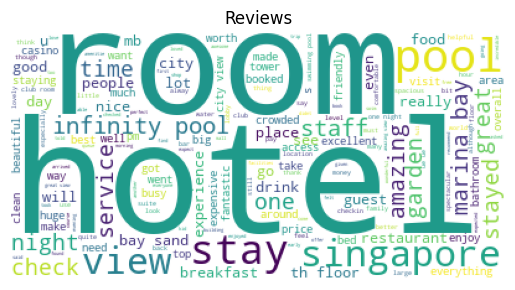

In [52]:
wordcloud_review = WordCloud(background_color="white")

# Generate a word cloud
wordcloud_review.generate(review_string)

plt.imshow(wordcloud_review)
plt.axis('off')
plt.title("Reviews")

plt.show()

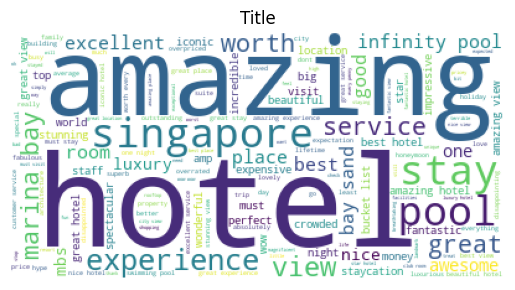

In [54]:
wordcloud_title = WordCloud(background_color="white")

wordcloud_title.generate(title_string)

plt.imshow(wordcloud_title)
plt.axis('off')
plt.title("Title")

plt.show()